<a href="https://colab.research.google.com/github/hansjang/Py_Radar/blob/main/%EB%B9%85%EB%B6%84%EA%B8%B0Part4_P280.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. 단순선형회귀 : 온도와 아이스크림 매출

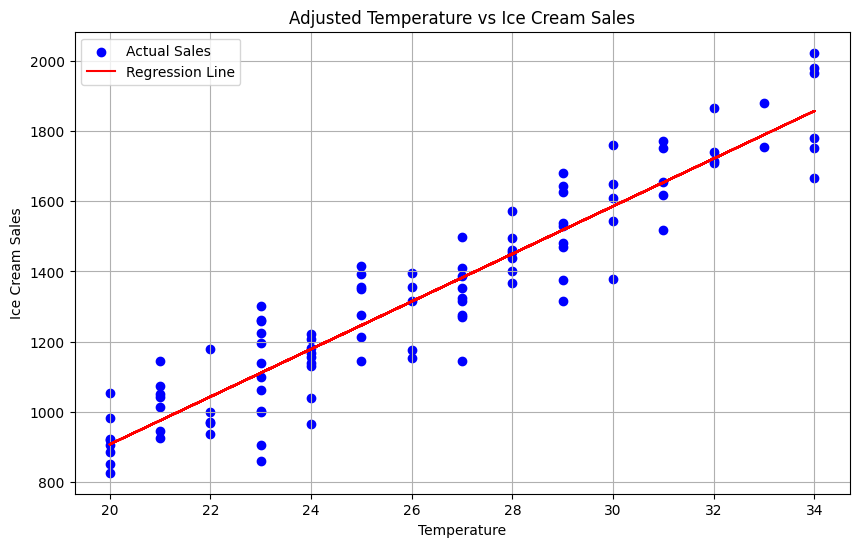

                            OLS Regression Results                            
Dep. Variable:        Ice_Cream_Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     680.3
Date:                Wed, 21 Aug 2024   Prob (F-statistic):           6.90e-46
Time:                        07:41:12   Log-Likelihood:                -606.75
No. Observations:                 100   AIC:                             1217.
Df Residuals:                      98   BIC:                             1223.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -452.2143     68.982     -6.556      

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 조정된 데이터 생성 : 온도와 아이스크림 매출
np.random.seed(0) # 결과의 일관성을 위해 시드 재설정
temperatures = np.random.randint(20, 35, 100) # 더 많은 데이터 포인트 추가
sales = temperatures * 70 - 500 + np.random.normal(0, 100, 100) # 기울기와 절편 조정, 변동성 조정

# DataFrame 생성
data = pd.DataFrame({
    'Temperature': temperatures,
    'Ice_Cream_Sales': sales
})

# statsmodels를 사용한 단순 선형 회귀 재적합
X = sm.add_constant(data['Temperature'])  # 상수항 추가
y = data['Ice_Cream_Sales']
model = sm.OLS(y, X).fit()  # 최소제곱법을 사용한 회귀 모델 재적합
                            # OLS : Ordinary Least Squares (오차의 제곱을 최소화하는 alpha와 beta를 추정하는 방식)

# 회귀선
data['Predicted_Sales'] = model.predict(X)

# 산점도 및 회귀선 플롯
plt.figure(figsize=(10,6))
plt.scatter(data['Temperature'], data['Ice_Cream_Sales'], color='blue', label='Actual Sales')
plt.plot(data['Temperature'], data['Predicted_Sales'], color='red', label='Regression Line')
plt.title('Adjusted Temperature vs Ice Cream Sales')
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Sales')
plt.legend()
plt.grid(True)
plt.show()

# 회귀모델 요약결과 출력
summary = model.summary()
print(summary)

# 3. 다중선형회귀 : 물고기 무게 예측

In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# 변수 조정 : 독립 변수 중 하나의 영향을 줄이고, 절편의 통계적 유의성을 높이기 위해 데이터 조정
np.random.seed(0) # 결과의 일관성을 위해 시드 재설정
fish_length_adj = np.random.uniform(15, 40, 100)    # 길이 : 조정 없음
fish_width_adj = np.random.uniform(5, 10, 100)      # 폭 : 조정 없음
fish_thickness_adj = np.random.uniform(1, 5, 100) * 0.1   # 두께 : 영향을 줄임
fish_fin_length_adj = np.random.uniform(3, 8, 100) #지느러미 길이 : 조정 없음

# 무게 계산식 조정 : 절편의 유의성을 높이기 위해 기본 무게를 추가
fish_weight_adj = (
    200 +
    20 * fish_length_adj +
    10 * fish_width_adj +
    5 * fish_thickness_adj +
    15 * fish_fin_length_adj +
    np.random.normal(0, 10, 100)
)

# 조정된 DataFrame 생성
fish_data_adj = pd.DataFrame({
    'Length': fish_length_adj,
    'Width' : fish_width_adj,
    'Thickness' : fish_thickness_adj,
    'Fin_Length' : fish_fin_length_adj,
    'Weight' : fish_weight_adj
})


# 다중 선형 회귀 모델 재생성
X_adj = fish_data_adj[['Length', 'Width', 'Thickness', 'Fin_Length']]     # 독립 변수
y_adj = fish_data_adj['Weight']                                           # 종속 변수
X_adj = sm.add_constant(X_adj)                                            # 상수항 추가

model_adj = sm.OLS(y_adj, X_adj).fit()  # 최소제곱법을 사용한 회귀모델 재적합

# 회귀모델 요약 결과 출력
summary_adj = model_adj.summary()
print(summary_adj)


                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     6376.
Date:                Wed, 21 Aug 2024   Prob (F-statistic):          1.72e-114
Time:                        08:18:47   Log-Likelihood:                -361.50
No. Observations:                 100   AIC:                             733.0
Df Residuals:                      95   BIC:                             746.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        191.6867      8.260     23.207      0.0

# 4. 다항선형회귀 : 주택 크기로 가격 예측

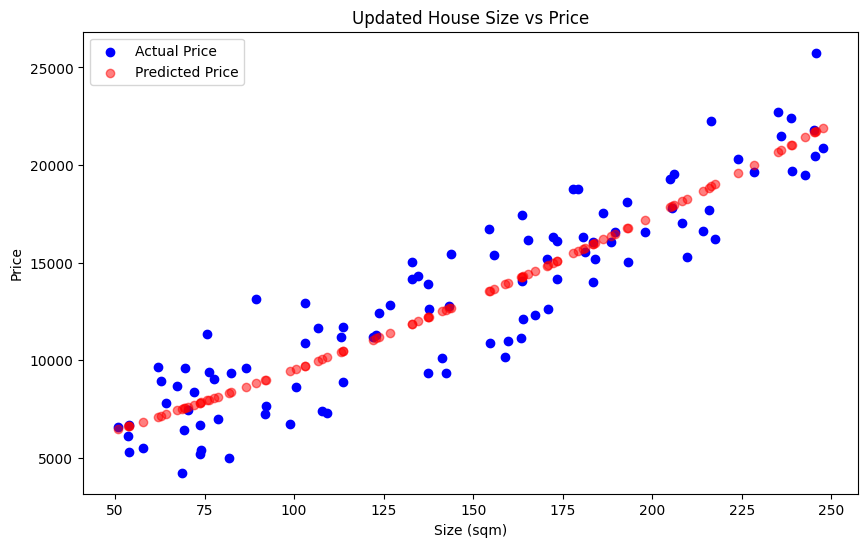

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     253.2
Date:                Wed, 21 Aug 2024   Prob (F-statistic):           3.15e-39
Time:                        08:36:49   Log-Likelihood:                -900.64
No. Observations:                 100   AIC:                             1807.
Df Residuals:                      97   BIC:                             1815.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3835.8351   1312.331      2.923      0.0

In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 데이터 생성
np.random.seed(0)
house_size = np.random.uniform(50, 250, 100)  # 주택 크기 : 50제곱미터에서 250제곱미터
house_price = (
    5000 +
    20 * house_size +
    0.2 * house_size**2 +
    np.random.normal(0, 2000, 100)
  )  # 주택 가격 : 강한 비선형 관계

# DataFrame 생성
house_data = pd.DataFrame({
    'Size': house_size,
    'Price' : house_price
})

# 다항 특성 생성 : Size^2
house_data['Size^2'] = house_data['Size']**2

# 다항 회귀 모델 재생성
X = house_data[['Size', 'Size^2']]  # 독립변수
y = house_data['Price']             # 종속변수
X = sm.add_constant(X)              # 상수항 추가

# 최소제곱법을 사용한 회귀 모델 재적합
model = sm.OLS(y, X).fit()

# 주택 크기와 수정된 가격의 관계 시각화
plt.figure(figsize=(10, 6))
plt.scatter(house_data['Size'], house_data['Price'], color='blue', label='Actual Price')

# 예측 가격 계산 및 플롯
predicted_price = model.predict(X)
plt.scatter(house_data['Size'], predicted_price, color='red', label='Predicted Price', alpha=0.5)
plt.title('Updated House Size vs Price')
plt.xlabel('Size (sqm)')
plt.ylabel('Price')
plt.legend()
plt.show()

# model
print(model.summary())

In [12]:
# 주요 지표 추출 방법
# 결정계수
r_squared = model.rsquared
print(f'결정계수 : {r_squared}')

# F통계량
fvalue = model.fvalue
print(f'F통계량 : {fvalue}')

# 회귀계수
# coef 값 확인
coefs = model.params
print(f'회귀계수 : {coefs}')
# coef 값 중 가장 큰 계수와 값 찾기
max_coef = coefs.idxmax(), coefs.max()
print(f'가장 큰 회귀계수와 값 : {max_coef}')


# p-value
pvalues = model.pvalues
print(f'p-value : {pvalues}')


# pvalue 값 중 가장 작은 값 찾기
min_pvalue = pvalues.idxmin(), pvalues.min()
print(f'가장 작은 pvalue 값 : {min_pvalue}')


결정계수 : 0.8392494501726393
F통계량 : 253.20969898446353
회귀계수 : const     3835.835139
Size        45.858287
Size^2       0.109619
dtype: float64
가장 큰 회귀계수와 값 : ('const', 3835.835138601015)
p-value : const     0.004315
Size      0.021498
Size^2    0.099439
dtype: float64
가장 작은 pvalue 값 : ('const', 0.004315298735788067)


# 5. 로지스틱 회귀 : iris

In [20]:
from sklearn.datasets import load_iris
import pandas as pd
import statsmodels.api as sm

# iris 데이터셋 로드
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# versicolor(1)와 virginica(2)만 선택하고, 종(species)을 이진 변수로 변환 : versicolor = 0, virginica = 1
iris_df['species'] = iris.target
iris_filtered = iris_df[(iris_df['species'] == 1) | (iris_df['species'] == 2)]
iris_filtered['species'] = iris_filtered['species'].map({1: 0 , 2: 1})

# 독립변수와 종속변수 설정
X = iris_filtered.drop('species', axis = 1)
y = iris_filtered['species']

# 로지스틱 회귀 모델 생성 및 적합
X = sm.add_constant(X)    # 상수항 추가
model = sm.Logit(y, X).fit()

# 모델 요약 결과 출력
summary = model.summary()
print(summary)


Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Wed, 21 Aug 2024   Pseudo R-squ.:                  0.9142
Time:                        09:01:35   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -42.6378     25.708     -1.659      0.097     -93.024       7.748
sepal l

<ipython-input-20-896492951200>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_filtered['species'] = iris_filtered['species'].map({1: 0 , 2: 1})
